### Import các thư viện cần thiết

In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.decomposition import PCA
import matplotlib.lines as mlines

In [114]:
data = pd.read_excel("OJ_data.xlsx")
X = data.iloc[:, 2:]
y = data["label"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [115]:
X_test.shape

(5, 13)

In [116]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

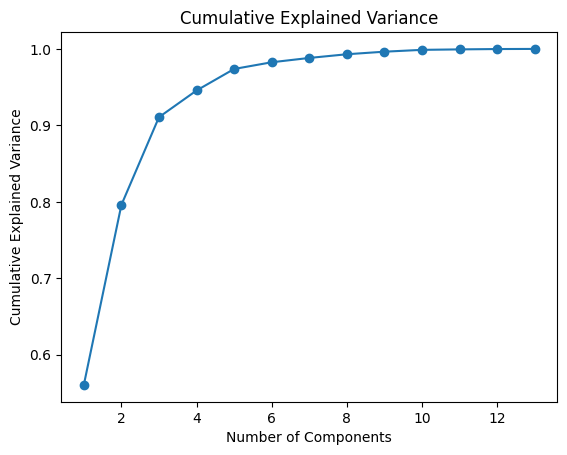

In [117]:
pca = PCA()
pca.fit(X_train)
explained_variance = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance)
plt.plot(np.arange(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance')
plt.show()

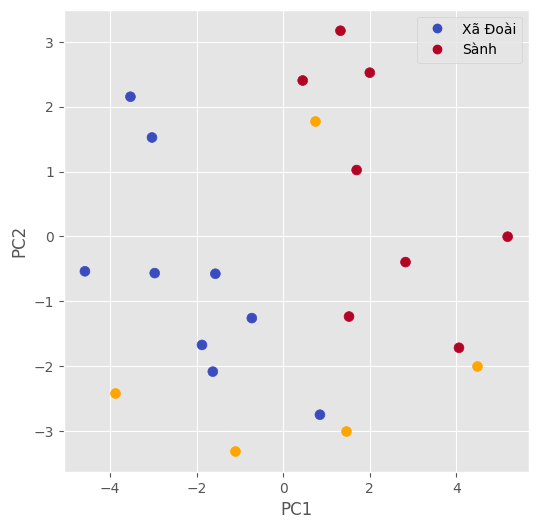

In [118]:
pca = PCA(2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
with plt.style.context(('ggplot')):
    plt.figure(figsize=(6,6))
    plt.set_cmap('coolwarm')
    xdoai = mlines.Line2D([], [], color=plt.get_cmap().get_under(), marker='o', ls='', label='Xã Đoài', alpha=1)
    sanh = mlines.Line2D([], [], color=plt.get_cmap().get_over(), marker='o', ls='', label='Sành', alpha=1)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, alpha=1, s=50)
    plt.scatter(X_test[:, 0], X_test[:, 1], c="orange", alpha=1, s=50)
    plt.legend(handles=[xdoai, sanh])
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.show()

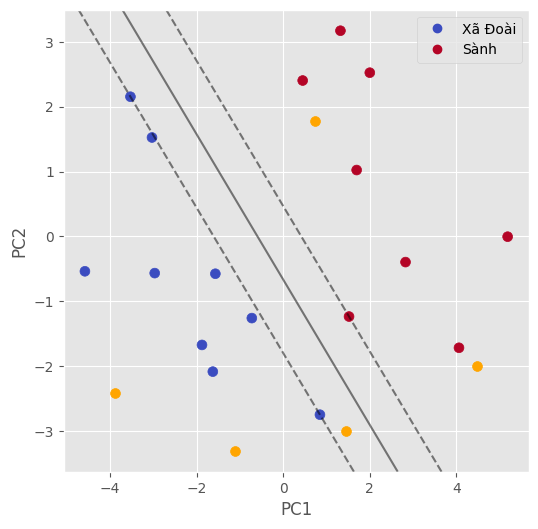

In [121]:
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
with plt.style.context(('ggplot')):
    plt.figure(figsize=(6,6))
    plt.set_cmap('coolwarm')
    xdoai = mlines.Line2D([], [], color=plt.get_cmap().get_under(), marker='o', ls='', label='Xã Đoài')
    sanh = mlines.Line2D([], [], color=plt.get_cmap().get_over(), marker='o', ls='', label='Sành')
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=50)
    plt.scatter(X_test[:, 0], X_test[:, 1], c="orange", s=50)
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    # create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = svm.decision_function(xy).reshape(XX.shape)
    # plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
            linestyles=['--', '-', '--'])
    # plot support vectors
    ax.scatter(svm.support_vectors_[:, 0], svm.support_vectors_[:, 1], s=100,
            linewidth=1, facecolors='none')
    plt.legend(handles=[xdoai, sanh])
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.show()

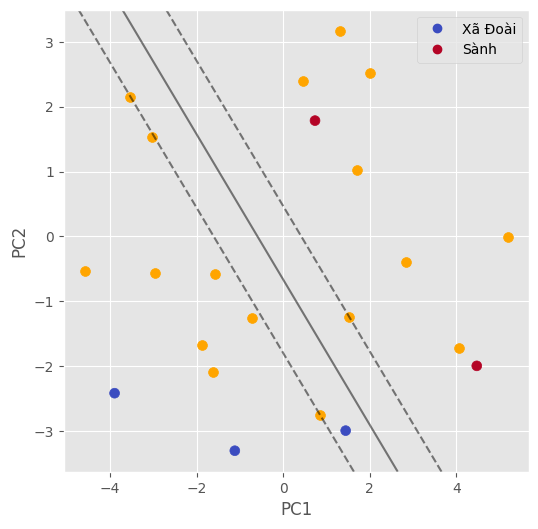

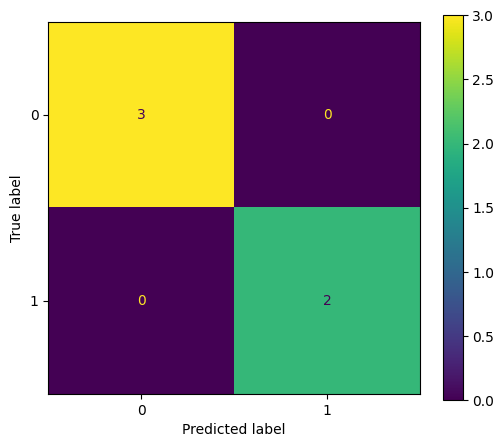

In [123]:
with plt.style.context(('ggplot')):
    plt.figure(figsize=(6,6))
    plt.set_cmap('coolwarm')
    xdoai = mlines.Line2D([], [], color=plt.get_cmap().get_under(), marker='o', ls='', label='Xã Đoài')
    sanh = mlines.Line2D([], [], color=plt.get_cmap().get_over(), marker='o', ls='', label='Sành')
    plt.scatter(X_train[:, 0], X_train[:, 1], c='orange', s=50)
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=50)
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    # create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = svm.decision_function(xy).reshape(XX.shape)
    # plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
            linestyles=['--', '-', '--'])
    # plot support vectors
    ax.scatter(svm.support_vectors_[:, 0], svm.support_vectors_[:, 1], s=100,
            linewidth=1, facecolors='none')
    plt.legend(handles=[xdoai, sanh])
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.show()
y_pred = svm.predict(X_test)
print(accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm)
fig, ax = plt.subplots(figsize=(6,5))
cmd.plot(ax=ax)
plt.show()

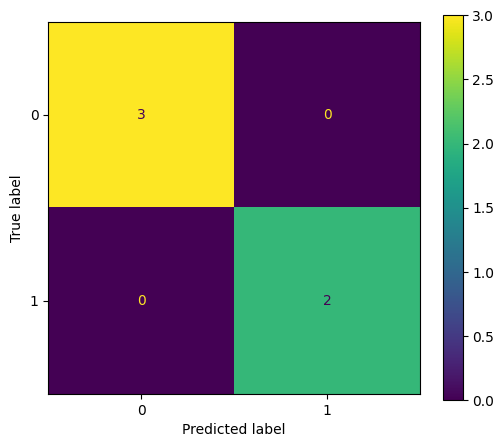

In [120]:
y_pred = svm.predict(X_test)
accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm)
fig, ax = plt.subplots(figsize=(6,5))
cmd.plot(ax=ax)
plt.show()